# KNN,Perceptron,SVM  For Multi-class and Two-class Recognition

In [284]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
from sklearn import datasets

# The digits dataset
digits = datasets.load_digits()

In [285]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (1797, 64)
target (1797,)
frame
feature_names
target_names (10,)
images (1797, 8, 8)
DESCR


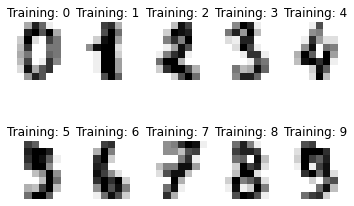

In [286]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


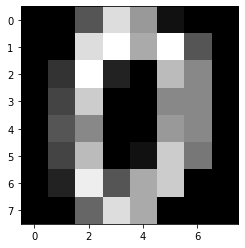

In [287]:
# 加载数据
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])
# 将第一幅图像显示出来
plt.gray()
plt.imshow(digits.images[0])
plt.show()

# Multi-class

In [288]:
from sklearn import preprocessing
# 分割数据，将 25% 的数据作为测试集，其余作为训练集（你也可以指定其他比例的数据作为训练集）

train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

# 采用 Z-Score 规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

## KNN multi-categories

In [289]:
# 创建 KNN 分类器
for i in range(1,10):
    knn =  KNeighborsClassifier(n_neighbors=i,algorithm='auto',weights='distance')
    knn.fit(train_ss_x, train_y) 
    predict_y = knn.predict(test_ss_x) 
    print("KNN with %s neighbors accuracy: %.4lf" % (i,accuracy_score(predict_y, test_y)))

KNN with 1 neighbors accuracy: 0.9800
KNN with 2 neighbors accuracy: 0.9800
KNN with 3 neighbors accuracy: 0.9756
KNN with 4 neighbors accuracy: 0.9778
KNN with 5 neighbors accuracy: 0.9733
KNN with 6 neighbors accuracy: 0.9778
KNN with 7 neighbors accuracy: 0.9756
KNN with 8 neighbors accuracy: 0.9733
KNN with 9 neighbors accuracy: 0.9711


## SVM multi-categories

In [290]:
from sklearn import svm
clf = svm.SVC(gamma='auto')
clf.fit(train_ss_x,train_y)

#评估模型的准确度
from sklearn.metrics import accuracy_score
Ypred = clf.predict(test_ss_x)
accuracy_score(test_y, Ypred)
clf.score(test_ss_x, test_y)


0.9866666666666667

#  Two-class

In [291]:
'''抽取二分类'''
import random
X_train=data
Y_train=digits.target

X_train=np.concatenate((X_train[Y_train==7],X_train[Y_train==9]),axis=0)
Y_train=np.concatenate((Y_train[Y_train==7],Y_train[Y_train==9]),axis=0)
train=np.concatenate((X_train,Y_train.reshape(-1,1)),axis=1)
random.shuffle(train)
train = np.array(train);
print(train.shape)
X_train = train[:,0:64]
Y_train = train[:,64]
print(X_train.shape)
print(Y_train.shape)


(359, 65)
(359, 64)
(359,)


In [292]:
#划分训练和测试集
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.25, random_state=33)
# 采用 Z-Score 规范化
ss = preprocessing.StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)
print(train_x.shape)
print(test_x.shape)


(269, 64)
(90, 64)


## SVM for Two categories

In [297]:
# 使用支持向量机来训练模型
from sklearn import svm

clf = svm.SVC()
clf.fit(train_x, train_y)

#评估模型的准确度
from sklearn.metrics import accuracy_score
Ypred = clf.predict(test_x);
print('Score: ',accuracy_score(test_y, Ypred));


Score:  0.9888888888888889


## Perceptron for Two categories

[-26.           0.          -7.14608185  -2.69481486  -3.27811931
  -4.25044271  -0.8369213   -4.45586684   0.78001366   0.
   0.07454335   3.52483019  -1.24567552  -5.32767665   2.00074453
  -4.12080498  -1.85527716   0.           8.12536537   0.31111909
  -5.62976762   0.61460893   2.68509373  -7.41136881   4.68815275
   0.          -7.10334146   0.0942132    1.22930652   6.07875575
   5.30565785  -1.77691399   0.           0.          -5.05667294
  -6.95762969  -8.44214705 -11.48288864   3.57896811  -3.15173893
   0.           0.           0.10438953  -3.66071564  -8.59674916
  -5.91636596   6.60184815   8.93433056   0.           0.
   5.91913096  -1.15236777  -3.6077676   -4.49850865  13.20155083
   7.81923465   0.           0.          -1.80830402  -2.88461966
   3.89121426   5.11852817  15.19495854   5.85024551   0.        ]
Accuracy in T1:  0.9777777778


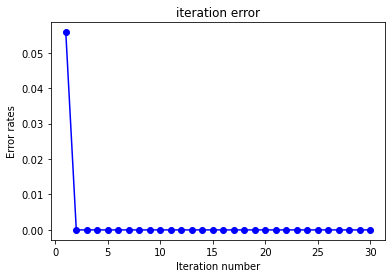

In [294]:
#Perceptron training

class Perception(object):
    """
    eta:学习率
    n_iter:权重向量的训练次数
    w_:神经分叉权重向量
    error_:用于记录神经元判断出错次数
    """
    def __init__(self, eta = 0.1, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, x, y):
        """
        输入训练数据，培训神经元，x输入样本向量，y对应样本分类
        x:shape[n_samples, n_features]
        x:[[1, 2, 3], [4, 5, 6]]
        n_samples:2
        n_features:3
        y:[1, -1]
        初始化权重向量为0
        加一是因为前面算法提到的w0，也就是步调函数的阈值
        """
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            """
            x:[[1, 2, 3], [4, 5, 6]]
            y:[1, -1]
            zip(x,y) = [[1, 2, 3, 1], [4, 5, 6, -1]]
            """
            for xi, target in zip(x, y):    #BGD
                """
                update = η * (y - y')
                """
                update = self.eta * (target - self.predict(xi))
                """
                xi是一个向量
                update * xi 等价：
                [▽w[1]=x[1]*update,▽w[2]=x[2]*update,▽w[3]=x[3]*update]
                """
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
                
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)





ppn = Perception(eta=1, n_iter=30);
ppn.fit(train_x, train_y-8);
print(ppn.w_)
plt.figure();

plt.xlabel('Iteration number')
plt.ylabel('Error rates')
plt.title('iteration error')
error = [x/len(train_y) for x in ppn.errors_]
plt.plot(range(1, ppn.n_iter+1), error,'bo-');


# print("The error in train data: " ,(ppn.errors_))

Y_pre = ppn.predict(test_x);
print('Accuracy in T1: % .10f' % accuracy_score(Y_pre, test_y-8));
